In [5]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


데이타 생성

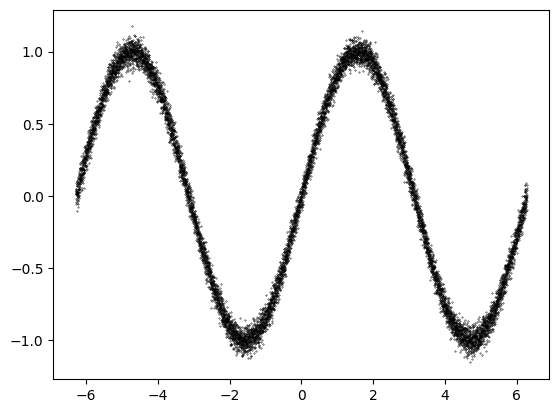

In [6]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05*np.random.normal(size=[len(inputs), 1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [7]:
model = Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

In [8]:
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.fit(inputs, outputs, epochs=20)

Epoch 1/20


2023-12-21 16:30:36.230313: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-21 16:30:36.808886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 9ms/step - loss: 0.3273 - mae: 0.3273
Epoch 2/20
313/313 [==============================] - 3s 8ms/step - loss: 0.1551 - mae: 0.1551
Epoch 3/20
313/313 [==============================] - 3s 9ms/step - loss: 0.1106 - mae: 0.1106
Epoch 4/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0799 - mae: 0.0799
Epoch 5/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0643 - mae: 0.0643
Epoch 6/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0564 - mae: 0.0564
Epoch 7/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0522 - mae: 0.0522
Epoch 8/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0534 - mae: 0.0534
Epoch 9/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0494 - mae: 0.0494
Epoch 10/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0485 - mae: 0.0485
Epoch 11/20
313/313 [==============================] - 3s 8m

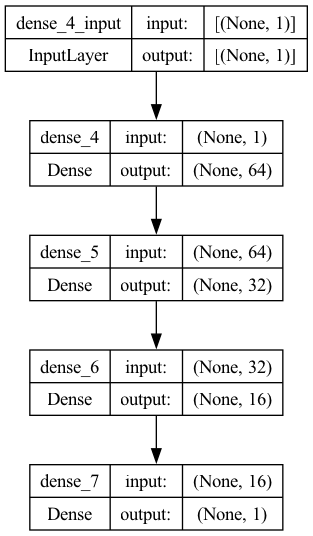

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [14]:
test_loss, test_mae = test_output_pred = model.evaluate(inputs,outputs, verbose = 0) # 언패킹
print(test_loss, test_mae)

2023-12-21 16:32:58.399150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.051763396710157394 0.051763396710157394


313/313 [==============================] - 1s 3ms/step


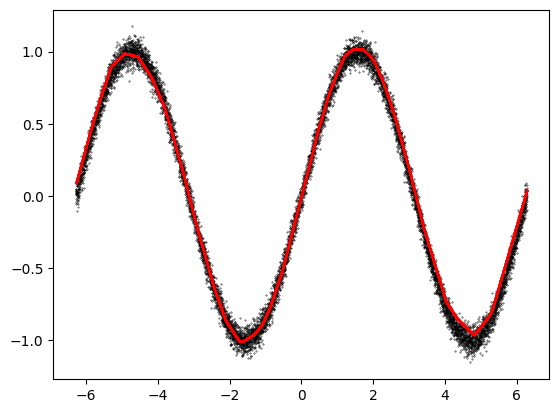

In [17]:
test_output_pred = model.predict(inputs)

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1) # s = size
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)